In [6]:
#Common Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Pytorch Packages 
import torch
from torch.nn import Linear
import torch.nn as nn

Text(0.5, 0, 'x')

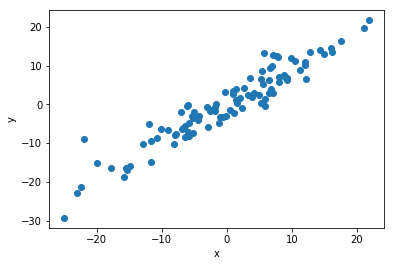

In [8]:
#The data and plotting it
x = torch.randn(100, 1)*10
y = x + 3*torch.randn(100,1)
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [12]:
#setting up the neural network
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [13]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [15]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [17]:
#creating a function to plot the linear regression with the data
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1,y1, 'r')
    plt.scatter(x,y)
    plt.show()

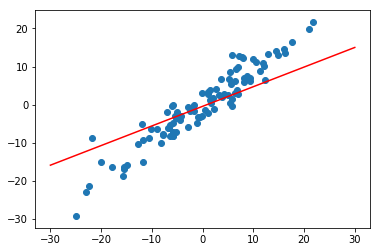

In [18]:
#plotting the linear regression
plot_fit('Initial model')

In [20]:
#Setting up the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
epochs = 100
losses = []

In [23]:
#Light up the torch
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 24.974468231201172
epoch: 1 loss: 23.889747619628906
epoch: 2 loss: 22.87875747680664
epoch: 3 loss: 21.93648338317871
epoch: 4 loss: 21.05825424194336
epoch: 5 loss: 20.23970603942871
epoch: 6 loss: 19.476778030395508
epoch: 7 loss: 18.765670776367188
epoch: 8 loss: 18.102863311767578
epoch: 9 loss: 17.48507308959961
epoch: 10 loss: 16.909225463867188
epoch: 11 loss: 16.372474670410156
epoch: 12 loss: 15.872160911560059
epoch: 13 loss: 15.40579605102539
epoch: 14 loss: 14.97108268737793
epoch: 15 loss: 14.5658540725708
epoch: 16 loss: 14.188112258911133
epoch: 17 loss: 13.835991859436035
epoch: 18 loss: 13.507749557495117
epoch: 19 loss: 13.201751708984375
epoch: 20 loss: 12.916492462158203
epoch: 21 loss: 12.650565147399902
epoch: 22 loss: 12.402647972106934
epoch: 23 loss: 12.171523094177246
epoch: 24 loss: 11.956048011779785
epoch: 25 loss: 11.755157470703125
epoch: 26 loss: 11.56786060333252
epoch: 27 loss: 11.393240928649902
epoch: 28 loss: 11.230429649353027
epoch

Text(0.5, 0, 'epoch')

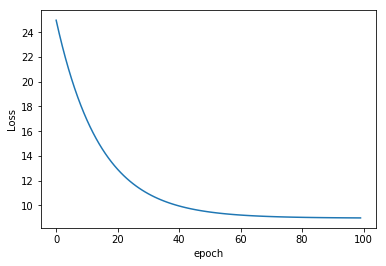

In [24]:
#plotting epoch loss graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

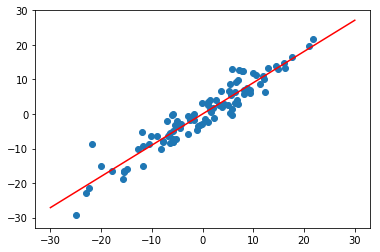

In [25]:
#Trained Model
plot_fit('Trained Model')